# Deep Learning
## Actividad 1: Deep Vision



-Simeon Milenov Mitev

-Daniel Gonzalez Valera

-Cristopher Pazmiño


# Actividad Deep Vision

Diseñar y comparar dos estrategias para la clasificación de imágenes en el dataset CIFAR100 de Keras (https://keras.io/api/datasets/cifar100/)

### **Estrategia 1: Red pre-entrenada**

La primera estrategia a comparar debe incluir la utilización de redes preentrenadas con el dataset ImageNet, llevando a cabo tareas de *transfer learning* y *fine-tuning* para clasificar los objetos de CIFAR100. Deben compararse al menos dos tipos de arquitecturas (VGGs, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, ResNet...) y se debe seleccionar la que mayor precisión nos dé (información sobre las arquitecturas disponibles en https://keras.io/applications/). Se espera que el ejercicio presente una profunda experimentación haciendo uso todas las técnicas de optimización mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (weight regularization, dropout, batch normalization, data augmentation, etc.).

### **Estrategia 2: Entrenar desde cero o from scratch**

La segunda estrategia a comparar será una red neuronal que se debe diseñar, entrenar y optimizar. Se requiere una justificación empírica de las decisiones que llevaron a la selección de atributos, capas e hiperparámetros a los que se ha llegado. Se espera que el ejercicio presente una profunda experimentación haciendo uso de todas las técnicas de optimización mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (weight regularization, dropout, batch normalization, data augmentation...).

## Normas a seguir

- Se debe entregar un **ÚNICO GOOGLE COLAB notebook** (archivo .ipynb) que incluya las instrucciones presentes y su **EJECUCIÓN!!!**. Debe aparecer todo el proceso seguido (carga de datos, visualización de datos, proceso de entrenamiento y proceso de validación del modelo).
- Poner el nombre del grupo en el nombre del archivo y el nombre de todos los integrantes del grupo al inicio del notebook.
- Las redes utilizadas deben estar entrenadas y con las métricas extraídas en el conjunto de test.
- Es recomendable crear una última sección de texto en el notebook en la que se discutan los diferentes modelos obtenidos y se extraigan las conclusiones pertinentes.

## Criterio de evaluación

- Seguimiento de las normas establecidas en la actividad.
- Efectividad al presentar las comparaciones entre métricas de evaluación de ambos modelos.
- Demostración de la utilización de técnicas de optimización para mejorar el rendimiento de los modelos.
- Modelos predictivos con rendimiento superior al aleatorio.
- Corrección en el uso de algoritmos, modelos y formas idiomáticas en Python.
- El código debe poder ejecutarse sin modificación alguna en Google Colaboratory.

Recomendaciones en el Uso de Colab:

- Eliminar las variables innecesarias para liberar RAM mediante la sentencia:

#Importamos Las Librerías

In [1]:
# Importamos Librerias Necesarias
import tensorflow as tf
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense
from tensorflow.keras.layers import Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import SGD, Adam, Adamax
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2

# Importando el set de datos CIFAR100
from tensorflow.keras.datasets import cifar100
from sklearn.preprocessing import LabelBinarizer

# Para Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Para la red vgg16
from keras.applications import vgg16 as vgg
from tensorflow.keras.applications.vgg16 import preprocess_input

In [2]:
# Carga de datos
print("[INFO]: Loading CIFAR-100 data...")
((trainX, trainY), (testX, testY)) = cifar100.load_data()

# CIFAR100 labelnames
labelNames = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']


[INFO]: Loading CIFAR-100 data...
169001437/169001437 [==============================] - 13s 0us/step


# VGG16

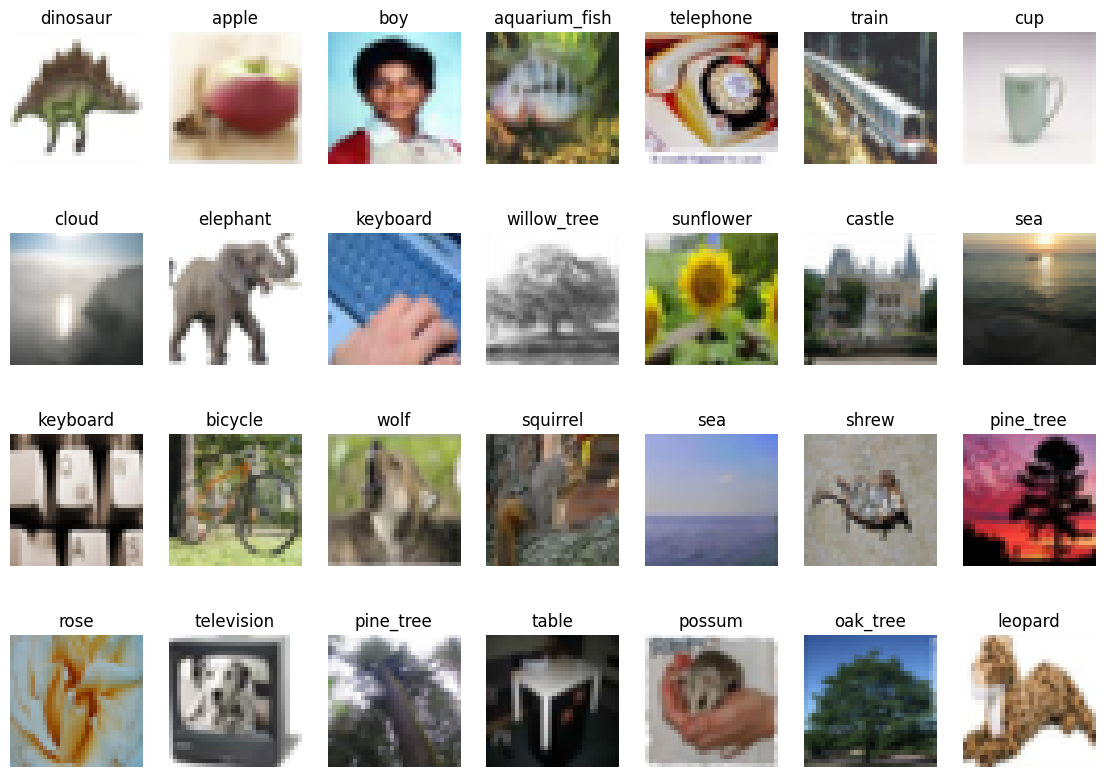

In [3]:
#tiene 100 clases que contienen 600 imágenes cada una.

#Hay 500 imágenes de entrenamiento y 100 imágenes de prueba por clase. Las 100 clases del CIFAR-100 se agrupan en 20 superclases.
#Cada imagen viene con una etiqueta "fina" (la clase a la que pertenece) y
#una etiqueta "gruesa" (la superclase a la que pertenece).

# Para ver algunos ejemplos:
fig = plt.figure(figsize=(14,10))
for n in range(1, 29):
    fig.add_subplot(4, 7, n)
    img = trainX[n]
    plt.imshow(img)
    plt.title(labelNames[trainY[n][0]])
    plt.axis('off')

In [4]:
def resize_img(images):
    tmp_images = []
    for image in images:
        tmp_image = cv2.resize(image, (48, 48), interpolation=cv2.INTER_CUBIC)
        tmp_image = tmp_image.astype("float") / 255.0
        tmp_images.append(tmp_image)

    return np.array(tmp_images)

# Preprocesamiento

In [5]:
trainX = resize_img(trainX)

In [6]:
testX = resize_img(testX)

In [7]:
print(trainX.shape)
print(trainY.shape)

(50000, 48, 48, 3)
(50000, 1)


In [8]:
print(testX.shape)
print(testY.shape)

(10000, 48, 48, 3)
(10000, 1)


In [9]:
# Utilizamos el One Hot Encoding:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [10]:
# Normalizamos
trainX = preprocess_input(trainX)
testX = preprocess_input(testX)

In [11]:
print(trainX.shape)
print(trainY.shape)

(50000, 48, 48, 3)
(50000, 100)


In [12]:
print("testX ",testX.shape)
print("testY ",testY.shape)

testX  (10000, 48, 48, 3)
testY  (10000, 100)


In [13]:
base_model = vgg.VGG16(weights='imagenet',
                 include_top=False,
                 pooling='max',
                 input_shape=(48,48,3))

base_model.summary()

58889256/58889256 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                              

In [14]:
# Congelamos las capas deseadas
for layer in base_model.layers:
  if layer.name == 'block_4_expand':
    break
  layer.trainable = False
  print('Capa ' + layer.name + ' congelada...')

Capa input_1 congelada...
Capa block1_conv1 congelada...
Capa block1_conv2 congelada...
Capa block1_pool congelada...
Capa block2_conv1 congelada...
Capa block2_conv2 congelada...
Capa block2_pool congelada...
Capa block3_conv1 congelada...
Capa block3_conv2 congelada...
Capa block3_conv3 congelada...
Capa block3_pool congelada...
Capa block4_conv1 congelada...
Capa block4_conv2 congelada...
Capa block4_conv3 congelada...
Capa block4_pool congelada...
Capa block5_conv1 congelada...
Capa block5_conv2 congelada...
Capa block5_conv3 congelada...
Capa block5_pool congelada...
Capa global_max_pooling2d congelada...


In [15]:
# Cogemos la última capa del modelo y le añadimos nuestro clasificador (Top Model):
last = base_model.layers[-1].output
x = Flatten()(last)
x = Dense(128, activation='relu', name='Top_Model')(x)
x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
x = Dense(100, activation='softmax', name='predictions')(x)

model_aug_vgg_VGG16 = Model(base_model.input, x)

In [16]:
# Compilamos el modelo
print("[INFO]: Compilando el modelo...")
model_aug_vgg_VGG16.compile(loss="categorical_crossentropy",
                  optimizer=Adam(learning_rate=0.0001,
                                   beta_1=0.9,
                                   beta_2=0.999,
                                   epsilon=1e-08),
                  metrics=["accuracy"])

[INFO]: Compilando el modelo...


In [17]:
model_aug_vgg_VGG16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [18]:
# En esta tabla podemos ver el número de pesos totales, entrenables y no entrenables.

In [19]:
early_stopping_vgg16 = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                   patience=4,
                                                   restore_best_weights=True)

In [20]:
# A continuación, procederemos a mejorar el overfitting con data augmentation.

datagen = ImageDataGenerator(rotation_range=15,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range=0.1,
                             zoom_range=0.2,
                             fill_mode='nearest',
                             horizontal_flip=True,
                             validation_split=0.2)

In [21]:
# Entrenamiento de la red
print("[INFO]: Entrenando la red...")

train_generator = datagen.flow(
  trainX,
  trainY,
  batch_size=128,
  subset= 'training'
)

validation_generator = datagen.flow(
  trainX,
  trainY,
  batch_size=128,
  subset= 'validation'
)

data_aug_factor = 2

H_aug = model_aug_vgg_VGG16.fit(
            train_generator,
            steps_per_epoch = train_generator.n*data_aug_factor//128,   # número de muestras/batchsize
            validation_data = validation_generator,
            validation_steps = validation_generator.n*data_aug_factor//128,
            workers = data_aug_factor,
            epochs = 50,
            callbacks=[early_stopping_vgg16]
            )

[INFO]: Entrenando la red...
Epoch 1/50
625/625 [==============================] - 65s 94ms/step - loss: 4.5436 - accuracy: 0.0261 - val_loss: 4.9640 - val_accuracy: 0.0199
Epoch 2/50
625/625 [==============================] - 58s 92ms/step - loss: 4.3749 - accuracy: 0.0447 - val_loss: 4.6511 - val_accuracy: 0.0338
Epoch 3/50
625/625 [==============================] - 58s 92ms/step - loss: 4.2867 - accuracy: 0.0594 - val_loss: 4.6574 - val_accuracy: 0.0286
Epoch 4/50
625/625 [==============================] - 57s 91ms/step - loss: 4.2346 - accuracy: 0.0690 - val_loss: 4.5671 - val_accuracy: 0.0329
Epoch 5/50
625/625 [==============================] - 57s 91ms/step - loss: 4.1932 - accuracy: 0.0743 - val_loss: 4.5635 - val_accuracy: 0.0417
Epoch 6/50
625/625 [==============================] - 57s 91ms/step - loss: 4.1633 - accuracy: 0.0792 - val_loss: 4.4343 - val_accuracy: 0.0521
Epoch 7/50
625/625 [==============================] - 57s 91ms/step - loss: 4.1467 - accuracy: 0.0825 - val

In [22]:
# Evaluamos los resultados del modelo
print("[INFO]: Evaluando el modelo...")
predictions = model_aug_vgg_VGG16.predict(testX, batch_size=128)

[INFO]: Evaluando el modelo...
79/79 [==============================] - 2s 27ms/step


In [23]:
# Vamos a obtener el report de clasificación
print(classification_report(testY.argmax(axis=1),
                            predictions.argmax(axis=1),
                            zero_division=0,
                            target_names=labelNames))

               precision    recall  f1-score   support

        apple       0.26      0.18      0.21       100
aquarium_fish       0.33      0.04      0.07       100
         baby       0.00      0.00      0.00       100
         bear       0.00      0.00      0.00       100
       beaver       0.00      0.00      0.00       100
          bed       0.00      0.00      0.00       100
          bee       0.02      0.02      0.02       100
       beetle       0.00      0.00      0.00       100
      bicycle       0.00      0.00      0.00       100
       bottle       0.04      0.12      0.07       100
         bowl       0.02      0.16      0.03       100
          boy       0.00      0.00      0.00       100
       bridge       0.00      0.00      0.00       100
          bus       0.20      0.02      0.04       100
    butterfly       1.00      0.01      0.02       100
        camel       0.17      0.01      0.02       100
          can       0.00      0.00      0.00       100
       ca

In [24]:
print(testX.shape, testY.shape)

(10000, 48, 48, 3) (10000, 100)


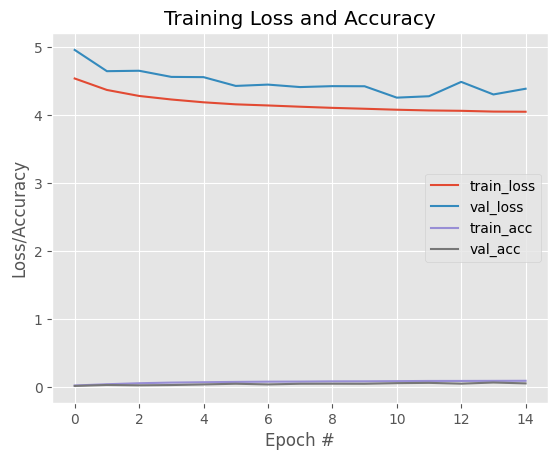

In [25]:
# Vamos a preparar la gráfica para poder ver los resultados.
plt.style.use("ggplot")
plt.figure()

# Calculamos la cantidad de épocas reales desde los datos.
epochs = len(H_aug.history["loss"])

# Usamos el número real de épocas para el rango de x.
plt.plot(np.arange(0, epochs), H_aug.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H_aug.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H_aug.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H_aug.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

#### Aproximación mejorada con mobileNetV2

In [26]:
# Import the necessary packages
import tensorflow as tf
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense
from tensorflow.keras.layers import Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import SGD, Adam, Adamax
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2

# Importando el set de datos CIFAR100
from tensorflow.keras.datasets import cifar100
from sklearn.preprocessing import LabelBinarizer

# For data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# para la red MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.applications import MobileNetV2

In [27]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [28]:
# Directorio para alojar los h5
BASE_FOLDER = '/content/drive/MyDrive/colab/'

#### - Cargando el conjunto de datos

In [29]:
print("[INFO]: Loading CIFAR-100 data...")
((trainX, trainY), (testX, testY)) = cifar100.load_data()

[INFO]: Loading CIFAR-100 data...


Analizamos las etiquetas CIFAR100

In [30]:
# CIFAR100 labelnames
labelNames = ['apple','aquarium_fish',
              'baby','bear','beaver','bed','bee','beetle','bicycle','bottle','bowl','boy','bridge','bus','butterfly',
              'camel','can','castle','caterpillar','cattle','chair','chimpanzee','clock','cloud','cockroach','couch','crab','crocodile','cup',
              'dinosaur','dolphin',
              'elephant',
              'flatfish','forest','fox',
              'girl',
              'hamster','house',
              'kangaroo','keyboard',
              'lamp','lawn_mower','leopard','lion','lizard','lobster',
              'man','maple_tree','motorcycle','mountain','mouse','mushroom',
              'oak_tree','orange','orchid','otter',
              'palm_tree','pear','pickup_truck','pine_tree','plain','plate','poppy','porcupine','possum',
              'rabbit','raccoon','ray','road','rocket','rose',
              'sea','seal','shark','shrew','skunk','skyscraper','snail','snake','spider','squirrel','streetcar','sunflower','sweet_pepper',
              'table','tank','telephone','television','tiger','tractor','train','trout','tulip','turtle',
              'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

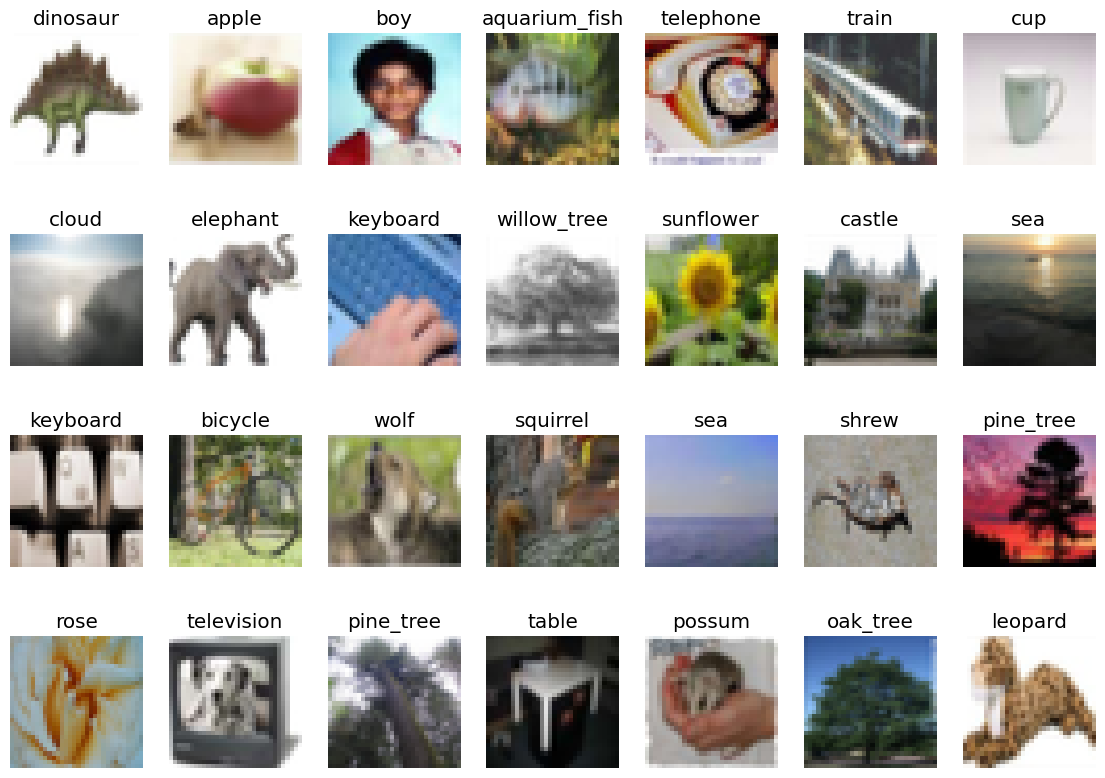

In [31]:
'''
Tiene 100 clases que contienen 600 imágenes cada una.

Hay 500 imágenes de entrenamiento y 100 imágenes de prueba por clase. Las 100 clases del CIFAR-100 se agrupan en 20 superclases.
Cada imagen viene con una etiqueta "fina" (la clase a la que pertenece) y una etiqueta "gruesa" (la superclase a la que pertenece).
'''
# Visualizing some examples
fig = plt.figure(figsize=(14,10))
for n in range(1, 29):
    fig.add_subplot(4, 7, n)
    img = trainX[n]
    plt.imshow(img)
    plt.title(labelNames[trainY[n][0]])
    plt.axis('off')

In [32]:
def resize_img(images):
    tmp_images = []
    for image in images:
        tmp_image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_CUBIC)
        tmp_images.append(tmp_image)

    return np.array(tmp_images)

# Preprocesamiento

In [33]:
# Aqui hacemos el mismo proceso que antes.
trainX = resize_img(trainX)

In [34]:
testX = resize_img(testX)

In [35]:
print(trainX.shape)
print(trainY.shape)

(50000, 96, 96, 3)
(50000, 1)


In [36]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [37]:
trainX = preprocess_input(trainX)
testX = preprocess_input(testX)

In [38]:
print(trainX.shape)
print(trainY.shape)

(50000, 96, 96, 3)
(50000, 100)


In [39]:
print("testX ",testX.shape)
print("testY ",testY.shape)

testX  (10000, 96, 96, 3)
testY  (10000, 100)


#### - Cargando la tipología de red pre-entrenada MobileNetV2

In [40]:
base_model = MobileNetV2(weights='imagenet',
                 include_top=False,
                 pooling='max',
                 alpha=1,
                 input_shape=(96,96,3))

base_model.summary()

9406464/9406464 [==============================] - 1s 0us/step
Model: "mobilenetv2_1.00_96"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 96, 96, 3)]          0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 48, 48, 32)           864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 48, 48, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU

In [41]:
# Congelamos las capas deseadas
for layer in base_model.layers:
  if layer.name == 'block_3_expand':
    break
  layer.trainable = False
  print('Capa ' + layer.name + ' congelada...')

Capa input_2 congelada...
Capa Conv1 congelada...
Capa bn_Conv1 congelada...
Capa Conv1_relu congelada...
Capa expanded_conv_depthwise congelada...
Capa expanded_conv_depthwise_BN congelada...
Capa expanded_conv_depthwise_relu congelada...
Capa expanded_conv_project congelada...
Capa expanded_conv_project_BN congelada...
Capa block_1_expand congelada...
Capa block_1_expand_BN congelada...
Capa block_1_expand_relu congelada...
Capa block_1_pad congelada...
Capa block_1_depthwise congelada...
Capa block_1_depthwise_BN congelada...
Capa block_1_depthwise_relu congelada...
Capa block_1_project congelada...
Capa block_1_project_BN congelada...
Capa block_2_expand congelada...
Capa block_2_expand_BN congelada...
Capa block_2_expand_relu congelada...
Capa block_2_depthwise congelada...
Capa block_2_depthwise_BN congelada...
Capa block_2_depthwise_relu congelada...
Capa block_2_project congelada...
Capa block_2_project_BN congelada...
Capa block_2_add congelada...


In [42]:
'''
La técnica de BatchNormalization introduce una etapa adicional en el procesamiento de las redes neuronales,
la cual se ubica justo después de la activación en cada capa oculta. Esta fase ajusta los datos de entrada a la
capa para que tengan una media de cero y una desviación estándar unitaria. Posteriormente, estos datos normalizados son
transformados aplicando una escala y un desplazamiento, acciones que se efectúan mediante dos conjuntos distintos de parámetros
que la red tiene la capacidad de aprender para cada capa oculta.
'''

'\nLa técnica de BatchNormalization introduce una etapa adicional en el procesamiento de las redes neuronales,\nla cual se ubica justo después de la activación en cada capa oculta. Esta fase ajusta los datos de entrada a la\ncapa para que tengan una media de cero y una desviación estándar unitaria. Posteriormente, estos datos normalizados son\ntransformados aplicando una escala y un desplazamiento, acciones que se efectúan mediante dos conjuntos distintos de parámetros\nque la red tiene la capacidad de aprender para cada capa oculta.\n'

In [43]:
# Cogemos la última capa del modelo y le añadimos nuestro clasificador (Top Model).
last = base_model.layers[-1].output
x = Flatten()(last)
x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
x = Dropout(0.80)(x)
x = Dense(100, activation='softmax', name='predictions')(x)

model = Model(base_model.input, x)

In [44]:
'''
El optimizador ADAM representa una técnica avanzada de optimización en la que se
aprovechan las cualidades de dos métodos distintos para mejorar el proceso de aprendizaje automático:

Por una parte, utiliza el concepto de Momentum del Gradiente Descendente, que consiste en recordar y
tomar en cuenta la actualización previa de los parámetros para influir en la nueva actualización.
Esto efectivamente dota al proceso de una especie de "memoria de dirección", que ayuda a mantener la continuidad y reduce las variaciones bruscas durante la optimización.

Por otra parte, implementa la estrategia del algoritmo RMSPROP, que ajusta el ritmo del aprendizaje basándose en la escala de los gradientes.
Esto permite que el entrenamiento se acelere o ralentice de forma inteligente en respuesta a la información recibida en cada paso.

La metodología de Adam combina con eficacia estas dos estrategias, asegurando que cada actualización de los parámetros incluya un
componente de Momentum y otro que regule el tamaño del paso.
Además, existe una variación llamada Adamax, derivada de Adam. Adamax se distingue por su habilidad para adaptar la tasa de aprendizaje automáticamente,
basándose en la norma infinita del gradiente, lo que lo hace especialmente útil en situaciones donde los patrones de los datos son volátiles o cambiantes,
como es el caso de las grabaciones de audio bajo distintas condiciones acústicas.

Para las estimaciones de los momentos se utilizan dos parámetros, beta_1 y beta_2. El primero es la tasa de decaimiento exponencial para las estimaciones del primer momento,
por defecto es 0.9. El segundo, beta_2, es la tasa de decaimiento para las estimaciones del segundo momento y su valor predeterminado es 0.999. Finalmente, epsilon se refiere
a un número muy pequeño que se añade para evitar cualquier problema de estabilidad numérica durante los cálculos.
'''

'\nEl optimizador ADAM representa una técnica avanzada de optimización en la que se\naprovechan las cualidades de dos métodos distintos para mejorar el proceso de aprendizaje automático:\n\nPor una parte, utiliza el concepto de Momentum del Gradiente Descendente, que consiste en recordar y\ntomar en cuenta la actualización previa de los parámetros para influir en la nueva actualización.\nEsto efectivamente dota al proceso de una especie de "memoria de dirección", que ayuda a mantener la continuidad y reduce las variaciones bruscas durante la optimización.\n\nPor otra parte, implementa la estrategia del algoritmo RMSPROP, que ajusta el ritmo del aprendizaje basándose en la escala de los gradientes.\nEsto permite que el entrenamiento se acelere o ralentice de forma inteligente en respuesta a la información recibida en cada paso.\n\nLa metodología de Adam combina con eficacia estas dos estrategias, asegurando que cada actualización de los parámetros incluya un\ncomponente de Momentum y ot

In [45]:
# Compilar el modelo
print("[INFO]: Compilando el modelo...")
model.compile(loss="categorical_crossentropy",
                  optimizer=Adamax(learning_rate=0.00018,
                                   beta_1=0.9,
                                   beta_2=0.999,
                                   epsilon=1e-08),
                  metrics=["accuracy"])

[INFO]: Compilando el modelo...


In [46]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 96, 96, 3)]          0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 48, 48, 32)           864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 48, 48, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 48, 48, 32)           0         ['bn_Conv1[0][0]']      

In [47]:
# En esta tabla podemos ver el número de pesos totales, entrenables y no entrenables.

In [48]:
early_stopping_pre = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                      patience=4,
                                                      restore_best_weights=True)

In [49]:
'''
La estrategia de ampliación de datos, o Data Augmentation, enriquece el conjunto de entrenamiento mediante la
creación de versiones modificadas de las imágenes existentes, lo que ayuda a prevenir el sobreajuste y actúa como
una forma de regularización.

'''

'\nLa estrategia de ampliación de datos, o Data Augmentation, enriquece el conjunto de entrenamiento mediante la\ncreación de versiones modificadas de las imágenes existentes, lo que ayuda a prevenir el sobreajuste y actúa como\nuna forma de regularización.\n\n'

In [50]:
# Vamos a mejorar el overfting con data augmentation. Crearemos un DataGenerator para el aumento de muestras.

datagenPre = ImageDataGenerator(rotation_range=15,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                horizontal_flip=True,
                                validation_split=0.2)

In [51]:
# Entrenamiento de la red
print("[INFO]: Entrenando la red...")

train_generator = datagenPre.flow(
  trainX,
  trainY,
  batch_size=32,
  subset= 'training'
)

validation_generator = datagenPre.flow(
  trainX,
  trainY,
  batch_size=32,
  subset= 'validation'
)

data_aug_factor = 2 # nº de imágenes sintéticas a generar por cada real

H_aug = model.fit(
            train_generator,
            steps_per_epoch = train_generator.n*data_aug_factor//32,   # nº de muestras/batchsize
            validation_data = validation_generator,
            validation_steps = validation_generator.n*data_aug_factor//32,
            workers = data_aug_factor, # nº máximo de procesos en paralelo para el preprocesamiento de datos
            epochs = 50,
            callbacks=[early_stopping_pre]
            )

[INFO]: Entrenando la red...
Epoch 1/50
2500/2500 [==============================] - 148s 51ms/step - loss: 4.4754 - accuracy: 0.2294 - val_loss: 1.4853 - val_accuracy: 0.5987
Epoch 2/50
2500/2500 [==============================] - 133s 53ms/step - loss: 2.3845 - accuracy: 0.4868 - val_loss: 1.1953 - val_accuracy: 0.6814
Epoch 3/50
2500/2500 [==============================] - 129s 51ms/step - loss: 1.8795 - accuracy: 0.5736 - val_loss: 1.1093 - val_accuracy: 0.7058
Epoch 4/50
2500/2500 [==============================] - 130s 52ms/step - loss: 1.5924 - accuracy: 0.6274 - val_loss: 1.0814 - val_accuracy: 0.7201
Epoch 5/50
2500/2500 [==============================] - 131s 52ms/step - loss: 1.3972 - accuracy: 0.6620 - val_loss: 1.0280 - val_accuracy: 0.7364
Epoch 6/50
2500/2500 [==============================] - 134s 54ms/step - loss: 1.2286 - accuracy: 0.6953 - val_loss: 1.0617 - val_accuracy: 0.7386
Epoch 7/50
2500/2500 [==============================] - 134s 54ms/step - loss: 1.1034 - a

In [52]:
# Evaluamos los resultados del modelo
print("[INFO]: Evaluando el modelo...")
predictions = model.predict(testX, batch_size=32)

[INFO]: Evaluando el modelo...
313/313 [==============================] - 3s 9ms/step


In [53]:
# Vamos a obtener el report de clasificación
print(classification_report(testY.argmax(axis=1),
                            predictions.argmax(axis=1),
                            target_names=labelNames))

               precision    recall  f1-score   support

        apple       0.79      0.97      0.87       100
aquarium_fish       0.83      0.92      0.87       100
         baby       0.65      0.67      0.66       100
         bear       0.73      0.72      0.72       100
       beaver       0.62      0.60      0.61       100
          bed       0.79      0.81      0.80       100
          bee       0.88      0.79      0.83       100
       beetle       0.85      0.78      0.81       100
      bicycle       0.97      0.89      0.93       100
       bottle       0.91      0.90      0.90       100
         bowl       0.63      0.54      0.58       100
          boy       0.66      0.47      0.55       100
       bridge       0.88      0.74      0.80       100
          bus       0.79      0.71      0.75       100
    butterfly       0.89      0.81      0.85       100
        camel       0.81      0.92      0.86       100
          can       0.86      0.83      0.84       100
       ca

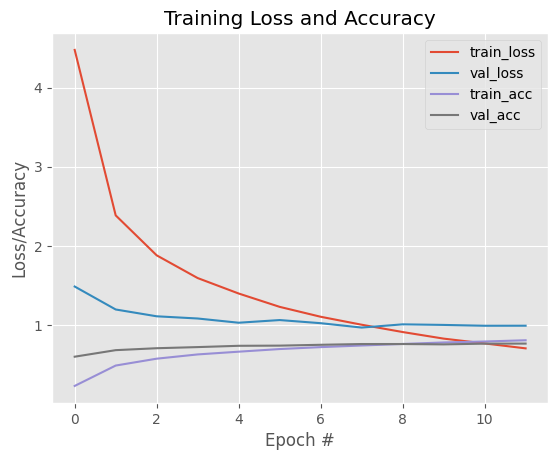

In [54]:
plt.style.use("ggplot")
plt.figure()

epochs = len(H_aug.history["loss"])

plt.plot(np.arange(0, epochs), H_aug.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H_aug.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H_aug.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H_aug.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

### **Estrategia 2: Entrenar desde cero o from scratch (Desarrollo)**

In [55]:
# Import the necessary packages
import tensorflow as tf
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense
from tensorflow.keras.layers import Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Importando el set de datos CIFAR100
from tensorflow.keras.datasets import cifar100
from sklearn.preprocessing import LabelBinarizer

# For data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [56]:
print("[INFO]: Loading CIFAR-100 data...")
((trainX, trainY), (testX, testY)) = cifar100.load_data()

[INFO]: Loading CIFAR-100 data...


In [57]:
# CIFAR100 labelnames
labelNames = ['apple','aquarium_fish',
              'baby','bear','beaver','bed','bee','beetle','bicycle','bottle','bowl','boy','bridge','bus','butterfly',
              'camel','can','castle','caterpillar','cattle','chair','chimpanzee','clock','cloud','cockroach','couch','crab','crocodile','cup',
              'dinosaur','dolphin',
              'elephant',
              'flatfish','forest','fox',
              'girl',
              'hamster','house',
              'kangaroo','keyboard',
              'lamp','lawn_mower','leopard','lion','lizard','lobster',
              'man','maple_tree','motorcycle','mountain','mouse','mushroom',
              'oak_tree','orange','orchid','otter',
              'palm_tree','pear','pickup_truck','pine_tree','plain','plate','poppy','porcupine','possum',
              'rabbit','raccoon','ray','road','rocket','rose',
              'sea','seal','shark','shrew','skunk','skyscraper','snail','snake','spider','squirrel','streetcar','sunflower','sweet_pepper',
              'table','tank','telephone','television','tiger','tractor','train','trout','tulip','turtle',
              'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

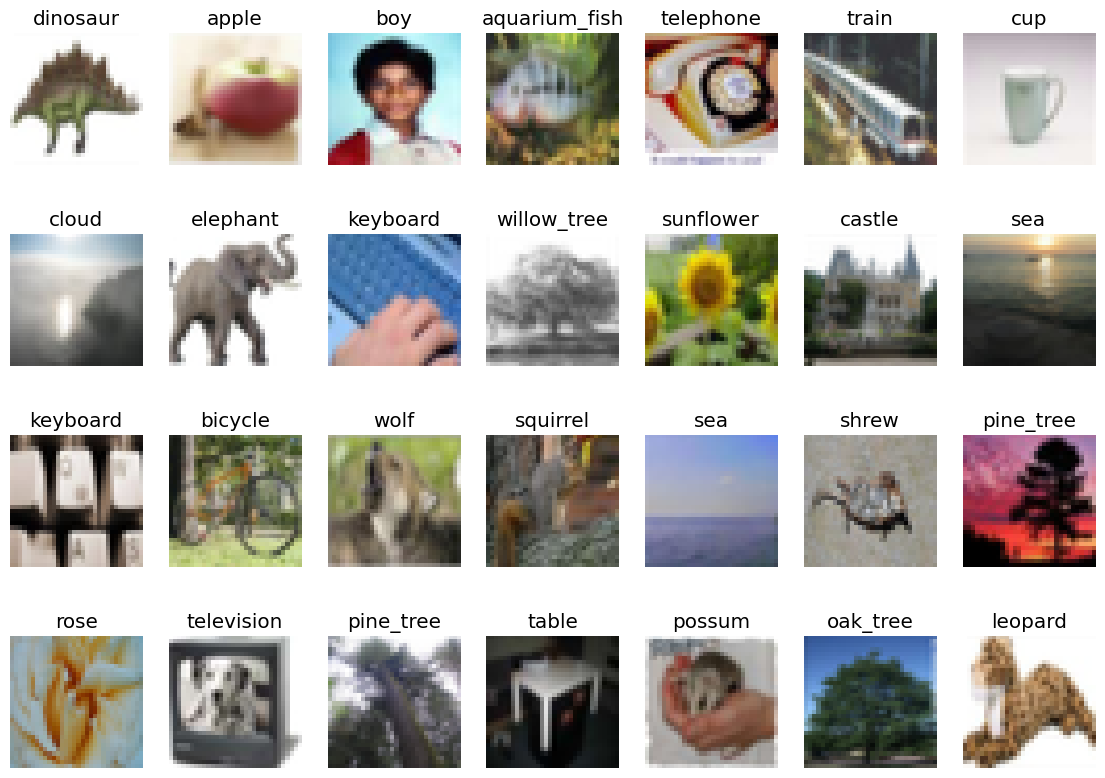

In [58]:
'''
Tiene 100 clases que contienen 600 imágenes cada una.

Hay 500 imágenes de entrenamiento y 100 imágenes de prueba por clase. Las 100 clases del CIFAR-100 se agrupan en 20 superclases.
Cada imagen viene con una etiqueta "fina" (la clase a la que pertenece) y una etiqueta "gruesa" (la superclase a la que pertenece).
'''
# Visualizing some examples
fig = plt.figure(figsize=(14,10))
for n in range(1, 29):
    fig.add_subplot(4, 7, n)
    img = trainX[n]
    plt.imshow(img)
    plt.title(labelNames[trainY[n][0]])
    plt.axis('off')

In [59]:
# PREPROCESADO DE LOS DATOS
#La intensidad de los pixeles esta represenatada como un integer desde 0 a 255. Para simplificar, se escala esta
#intensidad a un rango entre 0 y 1. Ademas los convierte en un float porque se divide por 255.0.
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

print(trainX.shape)
print(trainY.shape)

(50000, 32, 32, 3)
(50000, 1)


In [60]:
# Por si es necesario convertir a one-hot encoding
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

print(trainX.shape)
print(trainY.shape)

(50000, 32, 32, 3)
(50000, 100)


In [61]:
print("testX ",testX.shape)
print("testY ",testY.shape)

testX  (10000, 32, 32, 3)
testY  (10000, 100)


In [62]:
# Vamos a mejorar el overfting con data augmentation

datagen = ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True,
                             validation_split=0.2)

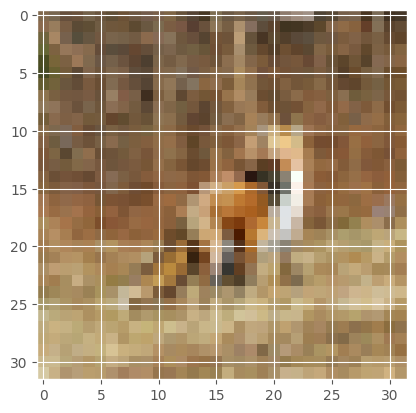

Label = fox


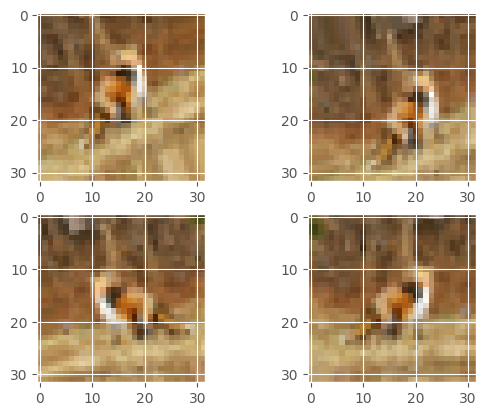

In [63]:
# Vamos a inspeccionar las imágenes sintéticas:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

sample = 120
plt.imshow(image.array_to_img(trainX[sample]))
plt.show()
print('Label = {}'.format(labelNames[trainY[sample].argmax(axis=0)]))

fig, axes = plt.subplots(2,2)
i = 0
for batch in datagen.flow(trainX[sample].reshape((1,32,32,3)),batch_size=1):
    axes[i//2,i%2].imshow(image.array_to_img(batch[0]))
    i += 1
    if i == 4:
        break
plt.show()

In [64]:
# Creamos la topologia de red neuronal y entrenamos:
inputs = Input(shape=(trainX.shape[1], trainX.shape[2], trainX.shape[3]))

# BASE MODEL
# Primer set de capas CONV => RELU => CONV => RELU => POOL
x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(inputs)
x1 = BatchNormalization()(x1)
x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)
x1 = Dropout(0.25)(x1)

# Segundo set de capas CONV => RELU => CONV => RELU => POOL
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x1)
x2 = BatchNormalization()(x2)
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.25)(x2)

# Tercer set de capas CONV => RELU => CONV => RELU => POOL
x3 = Conv2D(256, (3, 3), padding="same", activation="relu")(x2)
x3 = BatchNormalization()(x3)
x3 = Conv2D(256, (3, 3), padding="same", activation="relu")(x3)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2))(x3)
x3 = Dropout(0.25)(x3)

# TOP MODEL
# Primer (y único) set de capas FC => RELU
xfc = Flatten()(x3)
xfc = Dense(512, activation="relu")(xfc)
xfc = BatchNormalization()(xfc)
xfc = Dropout(0.5)(xfc)

# Clasificador softmax
predictions = Dense(100, activation="softmax")(xfc)

In [65]:
# Unimos las entradas y el modelo mediante la función Model
# con parámetros inputs y ouputs
model_aug = Model(inputs=inputs, outputs=predictions)
model_aug.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_2 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_3 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0   

In [66]:
# Compilar el modelo
print("[INFO]: Compilando el modelo...")
model_aug.compile(loss="categorical_crossentropy",
                  optimizer=Adam(learning_rate=0.001,
                                 beta_1=0.9,
                                 beta_2=0.999,
                                 epsilon=1e-08),
                  metrics=["accuracy"])


[INFO]: Compilando el modelo...


In [67]:
'''
steps_per_epoch: Representa el número total de pasos (lotes de muestras) antes de declarar una época como terminada y comenzar la siguiente.

early stopping callback: Hemos creado un callback utilizando la función EarlyStopping. En este caso, seguimos el comportamiento del error de validación.
Después de observar el valor mínimo, esperamos cuatro iteraciones adicionales. Si el valor no se reduce en ese tiempo, detenemos el entrenamiento.

'''

'\nsteps_per_epoch: Representa el número total de pasos (lotes de muestras) antes de declarar una época como terminada y comenzar la siguiente.\n\nearly stopping callback: Hemos creado un callback utilizando la función EarlyStopping. En este caso, seguimos el comportamiento del error de validación.\nDespués de observar el valor mínimo, esperamos cuatro iteraciones adicionales. Si el valor no se reduce en ese tiempo, detenemos el entrenamiento.\n\n'

In [68]:
early_stopping2 = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                   patience=4,
                                                   restore_best_weights=True)

In [69]:
# Entrenamiento de la red
print("[INFO]: Entrenando la red...")

train_generator = datagen.flow(
  trainX,
  trainY,
  batch_size=32,
  subset= 'training'
)

validation_generator = datagen.flow(
  trainX,
  trainY,
  batch_size=32,
  subset= 'validation'
)

data_aug_factor = 2 # nº de imágenes sintéticas a generar por cada real

H_aug = model_aug.fit(
            train_generator,
            steps_per_epoch = train_generator.n*data_aug_factor//32,   # nº de muestras/batchsize
            validation_data = validation_generator,
            validation_steps = validation_generator.n*data_aug_factor//32,
            workers = data_aug_factor, # nº máximo de procesos en paralelo para el preprocesamiento de datos
            epochs = 50,
            callbacks=[early_stopping2]
            )


[INFO]: Entrenando la red...
Epoch 1/50
2500/2500 [==============================] - 64s 24ms/step - loss: 3.7989 - accuracy: 0.1440 - val_loss: 3.1221 - val_accuracy: 0.2421
Epoch 2/50
2500/2500 [==============================] - 54s 22ms/step - loss: 2.8713 - accuracy: 0.2818 - val_loss: 2.5547 - val_accuracy: 0.3434
Epoch 3/50
2500/2500 [==============================] - 59s 24ms/step - loss: 2.5155 - accuracy: 0.3506 - val_loss: 2.3889 - val_accuracy: 0.3803
Epoch 4/50
2500/2500 [==============================] - 62s 25ms/step - loss: 2.2770 - accuracy: 0.4032 - val_loss: 2.0590 - val_accuracy: 0.4514
Epoch 5/50
2500/2500 [==============================] - 55s 22ms/step - loss: 2.1150 - accuracy: 0.4375 - val_loss: 2.0119 - val_accuracy: 0.4618
Epoch 6/50
2500/2500 [==============================] - 60s 24ms/step - loss: 1.9981 - accuracy: 0.4649 - val_loss: 1.8144 - val_accuracy: 0.5059
Epoch 7/50
2500/2500 [==============================] - 59s 24ms/step - loss: 1.8973 - accuracy

In [70]:
# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")
# Efectuamos la predicción (empleamos el mismo valor de batch_size que en training)
predictions = model_aug.predict(testX, batch_size=32)

[INFO]: Evaluando el modelo...
313/313 [==============================] - 1s 2ms/step


In [71]:
print(classification_report(testY.argmax(axis=1),
                            predictions.argmax(axis=1),
                            target_names=labelNames))

               precision    recall  f1-score   support

        apple       0.89      0.80      0.84       100
aquarium_fish       0.84      0.71      0.77       100
         baby       0.59      0.55      0.57       100
         bear       0.51      0.39      0.44       100
       beaver       0.45      0.46      0.45       100
          bed       0.53      0.76      0.62       100
          bee       0.75      0.73      0.74       100
       beetle       0.59      0.67      0.63       100
      bicycle       0.79      0.77      0.78       100
       bottle       0.87      0.66      0.75       100
         bowl       0.58      0.43      0.49       100
          boy       0.42      0.29      0.34       100
       bridge       0.62      0.75      0.68       100
          bus       0.56      0.68      0.62       100
    butterfly       0.56      0.62      0.59       100
        camel       0.55      0.61      0.58       100
          can       0.67      0.62      0.64       100
       ca

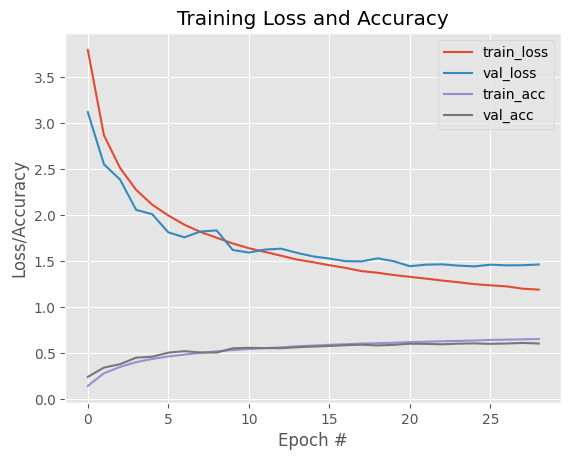

In [72]:
# Gráficas
plt.style.use("ggplot")
plt.figure()

# Calcular la cantidad de épocas reales desde los datos
epochs = len(H_aug.history["loss"])

# Usar el número real de épocas para el rango de x
plt.plot(np.arange(0, epochs), H_aug.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H_aug.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H_aug.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H_aug.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

# Conclusiones


In [73]:
'''
Iniciando con el análisis de las redes preentrenadas, se optó por experimentar con mobileNetV2 y las variantes de VGG
(específicamente vgg16), encontrando que mobileNetV2 ofrecía un rendimiento superior, especialmente con imágenes de dimensiones 96x96x3.
Con respecto a vgg16, se realizaron varias iteraciones ajustando la técnica de data augmentation y la estrategia de congelar ciertas capas para afinar
el model. En cambio, en mobileNetV2, la decisión fue congelar únicamente hasta la tercera capa, permitiendo el reentrenamiento del resto. Diversas
configuraciones se probaron en el modelo superior y, al final, la implementación de data augmentation demostró ser eficaz en la disminución del sobreajuste.
En tan solo 14 épocas, el modelo ya reflejaba una precisión superior al 75%.

Por otro lado, al desarrollar un modelo desde cero, se requiere de un número mayor de épocas, lo que implica una carga computacional más
extensa y, en consecuencia, resultados menos destacables en comparación con los obtenidos mediante la técnica de ajuste fino o fine-tuning de un
modelo preentrenado. Además, alcanzar niveles más altos de precisión en esta última modalidad necesita una inversión de tiempo adicional en el diseño
y ajuste del modelo.

'''

'\nIniciando con el análisis de las redes preentrenadas, se optó por experimentar con mobileNetV2 y las variantes de VGG\n(específicamente vgg16), encontrando que mobileNetV2 ofrecía un rendimiento superior, especialmente con imágenes de dimensiones 96x96x3.\nCon respecto a vgg16, se realizaron varias iteraciones ajustando la técnica de data augmentation y la estrategia de congelar ciertas capas para afinar\nel modelo. En cambio, en mobileNetV2, la decisión fue congelar únicamente hasta la tercera capa, permitiendo el reentrenamiento del resto. Diversas\nconfiguraciones se probaron en el modelo superior y, al final, la implementación de data augmentation demostró ser eficaz en la disminución del sobreajuste.\nEn tan solo 14 épocas, el modelo ya reflejaba una precisión superior al 75%.\n\nPor otro lado, al desarrollar un modelo desde cero, se requiere de un número mayor de épocas, lo que implica una carga computacional más\nextensa y, en consecuencia, resultados menos destacables en com